# NLTK

In [1]:
import nltk
# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

# Information Extraction
I took a sentence from The New York Times, “European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices.”

In [2]:
example = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'

# Then we apply word tokenization and part-of-speech tagging to the sentence.

In [3]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [4]:
sent = preprocess(example)
sent

[('European', 'JJ'),
 ('authorities', 'NNS'),
 ('fined', 'VBD'),
 ('Google', 'NNP'),
 ('a', 'DT'),
 ('record', 'NN'),
 ('$', '$'),
 ('5.1', 'CD'),
 ('billion', 'CD'),
 ('on', 'IN'),
 ('Wednesday', 'NNP'),
 ('for', 'IN'),
 ('abusing', 'VBG'),
 ('its', 'PRP$'),
 ('power', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mobile', 'JJ'),
 ('phone', 'NN'),
 ('market', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('the', 'DT'),
 ('company', 'NN'),
 ('to', 'TO'),
 ('alter', 'VB'),
 ('its', 'PRP$'),
 ('practices', 'NNS')]

We get a list of tuples containing the individual words in the sentence and their associated part-of-speech.

Now we’ll implement noun phrase chunking to identify named entities using a regular expression consisting of rules that indicate how sentences should be chunked.

Our chunk pattern consists of one rule, that a noun phrase, NP, should be formed whenever the chunker finds an optional determiner, DT, followed by any number of adjectives, JJ, and then a noun, NN.

In [5]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'

# Chunking

Using this pattern, we create a chunk parser and test it on our sentence.

In [6]:
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
print(cs)

(S
  European/JJ
  authorities/NNS
  fined/VBD
  Google/NNP
  (NP a/DT record/NN)
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  (NP power/NN)
  in/IN
  (NP the/DT mobile/JJ phone/NN)
  (NP market/NN)
  and/CC
  ordered/VBD
  (NP the/DT company/NN)
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)


The output can be read as a tree or a hierarchy with S as the first level, denoting sentence. 

IOB tags have become the standard way to represent chunk structures in files, and we will also be using this format.

In [7]:
from nltk.chunk import conlltags2tree, tree2conlltags, ne_chunk
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
from pprint import pprint
iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

[('European', 'JJ', 'O'),
 ('authorities', 'NNS', 'O'),
 ('fined', 'VBD', 'O'),
 ('Google', 'NNP', 'O'),
 ('a', 'DT', 'B-NP'),
 ('record', 'NN', 'I-NP'),
 ('$', '$', 'O'),
 ('5.1', 'CD', 'O'),
 ('billion', 'CD', 'O'),
 ('on', 'IN', 'O'),
 ('Wednesday', 'NNP', 'O'),
 ('for', 'IN', 'O'),
 ('abusing', 'VBG', 'O'),
 ('its', 'PRP$', 'O'),
 ('power', 'NN', 'B-NP'),
 ('in', 'IN', 'O'),
 ('the', 'DT', 'B-NP'),
 ('mobile', 'JJ', 'I-NP'),
 ('phone', 'NN', 'I-NP'),
 ('market', 'NN', 'B-NP'),
 ('and', 'CC', 'O'),
 ('ordered', 'VBD', 'O'),
 ('the', 'DT', 'B-NP'),
 ('company', 'NN', 'I-NP'),
 ('to', 'TO', 'O'),
 ('alter', 'VB', 'O'),
 ('its', 'PRP$', 'O'),
 ('practices', 'NNS', 'O')]


In this representation, there is one token per line, each with its part-of-speech tag and its named entity tag. Based on this training corpus, we can construct a tagger that can be used to label new sentences; and use the nltk.chunk.conlltags2tree() function to convert the tag sequences into a chunk tree.

# With the function nltk.ne_chunk(), we can recognize named entities using a classifier, the classifier adds category labels such as PERSON, ORGANIZATION, and GPE.

In [8]:
ne_tree = ne_chunk(pos_tag(word_tokenize(example)))
print(ne_tree)

(S
  (GPE European/JJ)
  authorities/NNS
  fined/VBD
  (PERSON Google/NNP)
  a/DT
  record/NN
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  power/NN
  in/IN
  the/DT
  mobile/JJ
  phone/NN
  market/NN
  and/CC
  ordered/VBD
  the/DT
  company/NN
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)


# SpaCy

SpaCy’s named entity recognition has been trained on the OntoNotes 5 corpus and it supports the following entity types:

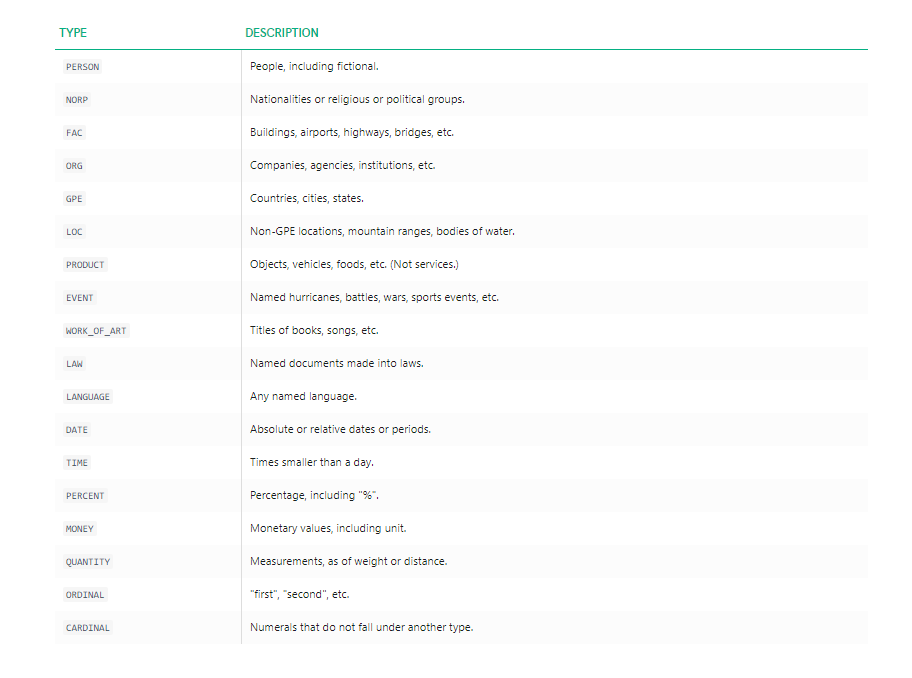

# Entity

In [9]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

We are using the same sentence, “European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices.”

One of the nice things about Spacy is that we only need to apply nlp once, the entire background pipeline will return the objects.

In [10]:
doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
pprint([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'),
 ('Google', 'ORG'),
 ('$5.1 billion', 'MONEY'),
 ('Wednesday', 'DATE')]


European is NORP (nationalities or religious or political groups), Google is an organization, $5.1 billion is monetary value and Wednesday is a date object. They are all correct.

# Token

During the above example, we were working on entity level, in the following example, we are demonstrating token-level entity annotation using the BILUO tagging scheme to describe the entity boundaries.


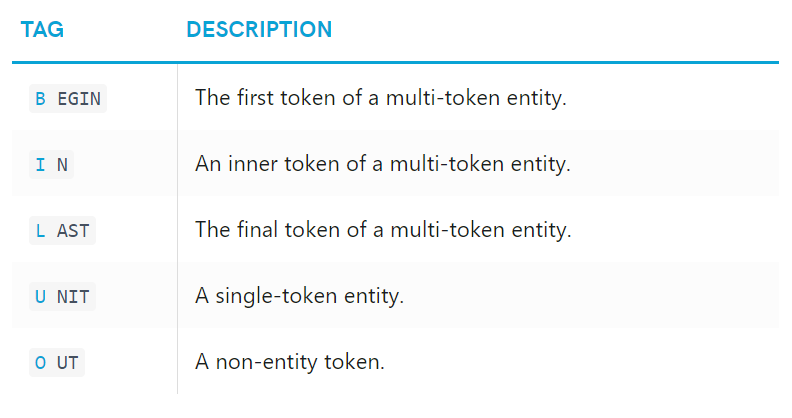

In [11]:
pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])

[(European, 'B', 'NORP'),
 (authorities, 'O', ''),
 (fined, 'O', ''),
 (Google, 'B', 'ORG'),
 (a, 'O', ''),
 (record, 'O', ''),
 ($, 'B', 'MONEY'),
 (5.1, 'I', 'MONEY'),
 (billion, 'I', 'MONEY'),
 (on, 'O', ''),
 (Wednesday, 'B', 'DATE'),
 (for, 'O', ''),
 (abusing, 'O', ''),
 (its, 'O', ''),
 (power, 'O', ''),
 (in, 'O', ''),
 (the, 'O', ''),
 (mobile, 'O', ''),
 (phone, 'O', ''),
 (market, 'O', ''),
 (and, 'O', ''),
 (ordered, 'O', ''),
 (the, 'O', ''),
 (company, 'O', ''),
 (to, 'O', ''),
 (alter, 'O', ''),
 (its, 'O', ''),
 (practices, 'O', '')]


"B" means the token begins an entity, "I" means it is inside an entity, "O" means it is outside an entity, and "" means no entity tag is set.

# Extracting named entity from an article

Now let’s get serious with SpaCy and extracting named entities from a New York Times article, — “F.B.I. Agent Peter Strzok, Who Criticized Trump in Texts, Is Fired.”

In [22]:
from bs4 import BeautifulSoup
import requests
import re
def url_to_string(url):
    res = requests.get(url)
    html = res.text
#     soup = BeautifulSoup(html, 'html5lib')
    soup = BeautifulSoup(html,  "html.parser")
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))
ny_bb = url_to_string('https://www.nytimes.com/2020/03/23/opinion/contributors/us-coronavirus-response.html')
article = nlp(ny_bb)
len(article.ents)

77

There are 155 entities in the article and they are represented as 10 unique labels:

In [23]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'DATE': 19,
         'ORG': 22,
         'WORK_OF_ART': 2,
         'PERSON': 6,
         'FAC': 1,
         'CARDINAL': 7,
         'NORP': 8,
         'PERCENT': 3,
         'GPE': 8,
         'LAW': 1})

The following are 7 most frequent tokens.

In [24]:
items = [x.text for x in article.ents]
Counter(items).most_common(7)

[('Americans', 5),
 ('the United States', 4),
 ('The New York Times', 2),
 ('a decade', 2),
 ('the University of Pennsylvania', 2),
 ('American', 2),
 ('China', 2)]

Let’s randomly select one sentence to learn more.

In [25]:
sentences = [x for x in article.sents]
print(sentences[20])

If the United States intervenes immediately on the scale that China did, our death toll could be under 100,000.


Let’s run displacy.render to generate the raw markup.

In [26]:
displacy.render(nlp(str(sentences[20])), jupyter=True, style='ent')

One miss-classification here is F.B.I. It is hard, isn’t it?

Using spaCy’s built-in displaCy visualizer, here’s what the above sentence and its dependencies look like:

In [27]:
displacy.render(nlp(str(sentences[20])), style='dep', jupyter = True, options = {'distance': 120})

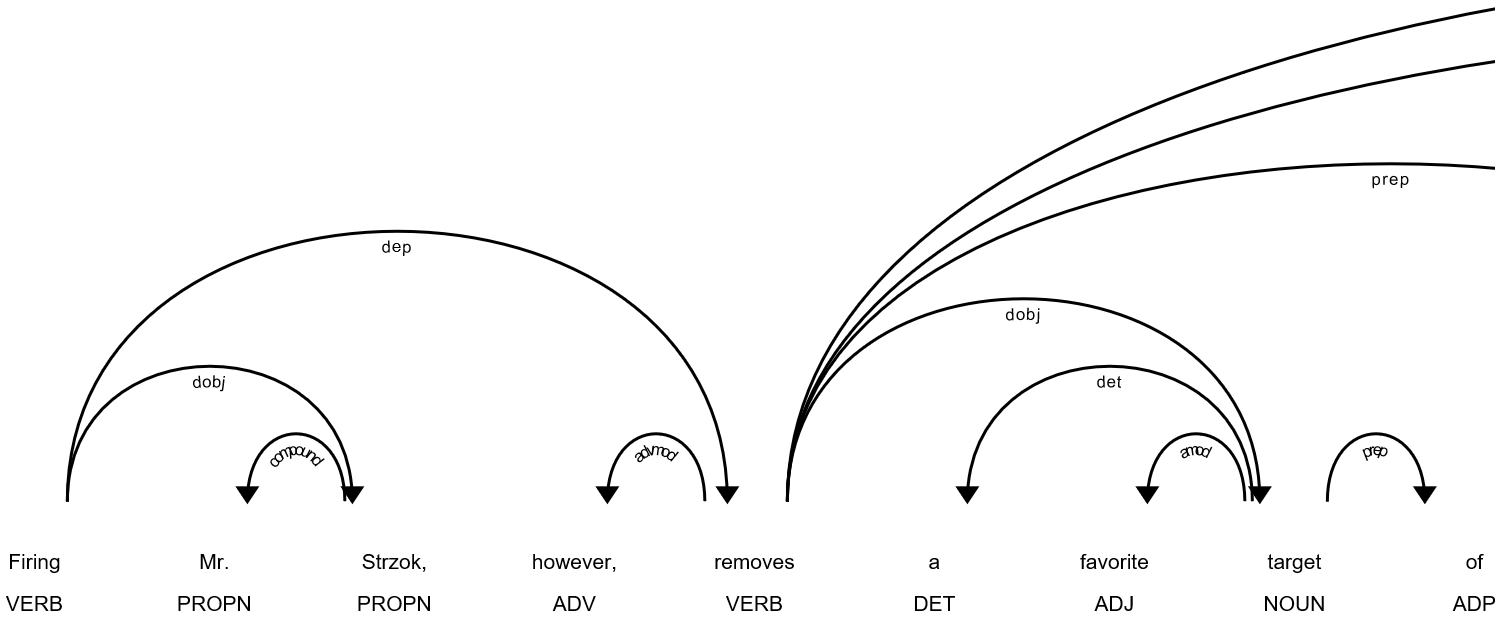

Next, we verbatim, extract part-of-speech and lemmatize this sentence.

In [28]:
[(x.orth_,x.pos_, x.lemma_) 
     for x in [y for y in nlp(str(sentences[20])) 
               if not y.is_stop and y.pos_ != 'PUNCT']]

[('United', 'PROPN', 'United'),
 ('States', 'PROPN', 'States'),
 ('intervenes', 'VERB', 'intervene'),
 ('immediately', 'ADV', 'immediately'),
 ('scale', 'NOUN', 'scale'),
 ('China', 'PROPN', 'China'),
 ('death', 'NOUN', 'death'),
 ('toll', 'NOUN', 'toll'),
 ('100,000', 'NUM', '100,000')]

In [29]:
dict([(str(x), x.label_) for x in nlp(str(sentences[20])).ents])

{'the United States': 'GPE', 'China': 'GPE', '100,000': 'CARDINAL'}

Named entity extraction are correct except “F.B.I”.

In [30]:
print([(x, x.ent_iob_, x.ent_type_) for x in sentences[20]])

[(If, 'O', ''), (the, 'B', 'GPE'), (United, 'I', 'GPE'), (States, 'I', 'GPE'), (intervenes, 'O', ''), (immediately, 'O', ''), (on, 'O', ''), (the, 'O', ''), (scale, 'O', ''), (that, 'O', ''), (China, 'B', 'GPE'), (did, 'O', ''), (,, 'O', ''), (our, 'O', ''), (death, 'O', ''), (toll, 'O', ''), (could, 'O', ''), (be, 'O', ''), (under, 'O', ''), (100,000, 'B', 'CARDINAL'), (., 'O', '')]


Finally, we visualize the entity of the entire article.

In [31]:
displacy.render(article, jupyter=True, style='ent')